In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [165]:
df = pd.read_csv('cancer_patient_datasets.csv')
df.sample()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
685,685,P715,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium


In [166]:
df = df.drop(['index','Patient Id'], axis=1)

In [167]:
df.sample()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
573,36,1,6,7,7,7,7,7,6,7,...,8,5,7,6,7,8,7,6,2,High


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [169]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="int64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5092\2763759203.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5092\2763759203.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [170]:
scale_mapper = {'Low':0,
                'Medium':1,
                 'High':2}

df['Level'] = df['Level'].replace(scale_mapper)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5092\1324779526.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level'] = df['Level'].replace(scale_mapper)


In [171]:
numerical

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

In [172]:
catgcols

['Level']

In [173]:
df['Level'].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [174]:
ind_col = [col for col in df.columns if col !='Level']
dep_col = 'Level'

In [175]:
df[dep_col].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [177]:
df['Level'] = le.fit_transform(df['Level'])

In [178]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [179]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [180]:
df.to_csv('datatransform_cancer_patient.csv')

In [181]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.50,shuffle = True,random_state=42)

In [182]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (500, 23) (500,)
Testing set shape: (500, 23) (500,)


## Algoritma Support Vector Machine

Akurasi data training = 0.98
Akurasi data testing = 0.96 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       156
           1       0.91      0.96      0.93       156
           2       0.96      1.00      0.98       188

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



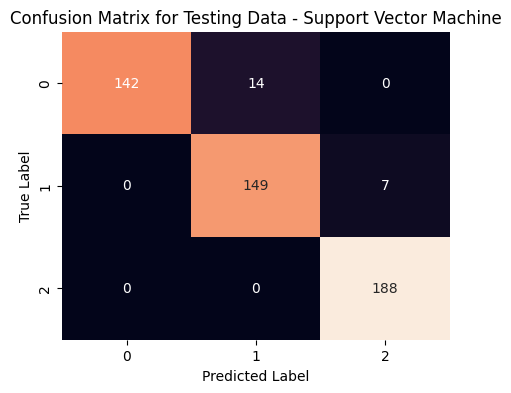

In [213]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

svc = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

model = svc.fit(x_train, y_train)

train_accuracy = accuracy_score(y_train, svc.predict(x_train))
test_accuracy = accuracy_score(y_test, svc.predict(x_test))

confusion = confusion_matrix(y_test, svc.predict(x_test))

print(f"Akurasi data training = {train_accuracy:.2f}")
print(f"Akurasi data testing = {test_accuracy:.2f} \n")

# Classification Report
print(f"Classification Report:\n {classification_report(y_test, svc.predict(x_test))}")

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Testing Data - Support Vector Machine")
plt.show()


## Algoritma Naive Bayes

Akurasi data training = 0.88
Akurasi data testing = 0.90 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       156
           1       0.87      0.84      0.85       156
           2       0.85      0.96      0.90       188

    accuracy                           0.90       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.90      0.90      0.90       500



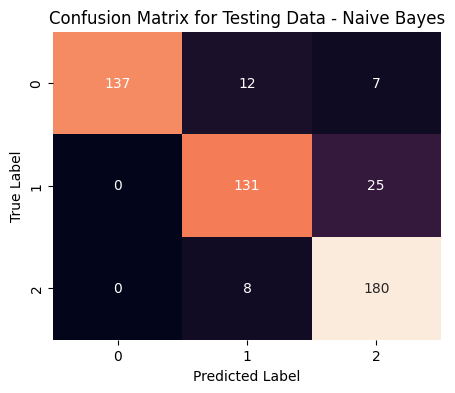

In [215]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

nb = GaussianNB()

model = nb.fit(x_train, y_train)

train_accuracy = accuracy_score(y_train, nb.predict(x_train))
test_accuracy = accuracy_score(y_test, nb.predict(x_test))

confusion = confusion_matrix(y_test, nb.predict(x_test))

print(f"Akurasi data training = {train_accuracy:.2f}")
print(f"Akurasi data testing = {test_accuracy:.2f} \n")

# Classification Report
print(f"Classification Report:\n {classification_report(y_test, nb.predict(x_test))}")

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Testing Data - Naive Bayes")
plt.show()


## Algoritma Decision Tree

Akurasi data training = 0.93
Akurasi data testing = 0.89 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       156
           1       0.74      1.00      0.85       156
           2       1.00      1.00      1.00       188

    accuracy                           0.89       500
   macro avg       0.91      0.88      0.88       500
weighted avg       0.92      0.89      0.89       500



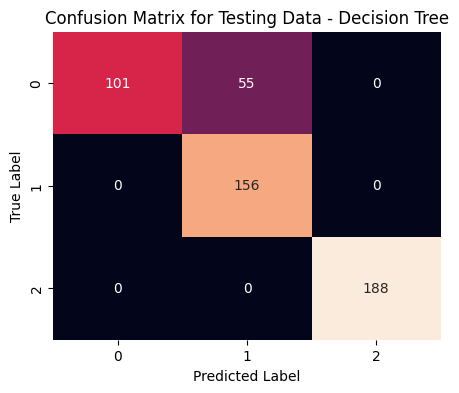

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best')

model = dt.fit(x_train, y_train)

train_accuracy = accuracy_score(y_train, dt.predict(x_train))
test_accuracy = accuracy_score(y_test, dt.predict(x_test))

confusion = confusion_matrix(y_test, dt.predict(x_test))

print(f"Akurasi data training = {train_accuracy:.2f}")
print(f"Akurasi data testing = {test_accuracy:.2f} \n")

# Classification Report
print(f"Classification Report:\n {classification_report(y_test, dt.predict(x_test))}")

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1', '2'],
            yticklabels=['0', '1', '2'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Testing Data - Decision Tree")
plt.show()


## Simulasi Model

In [194]:
print(f"Model expects {model.n_features_in_} features.")

Model expects 23 features.


In [205]:

input_data = (64, 2, 6, 8, 7, 7, 7, 6, 7, 7, 7, 8, 7, 7, 9, 6, 5, 7, 2, 4, 3, 1, 4)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('Risiko kanker paru: Rendah (Class 0)')
elif prediction[0] == 1:
    print('Risiko kanker paru: Sedang (Class 1)')
else:
    print('Risiko kanker paru: Tinggi (Class 2)')


[2]
Risiko kanker paru: Tinggi (Class 2)


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [206]:
df = pd.read_csv('predict_datatransform_cancer_patient.csv')
print(df.columns)


Index(['Unnamed: 0', 'Age', 'Gender', 'Air_Pollution', 'Alcohol_use',
       'Dust_Allergy', 'OccuPational_Hazards', 'Genetic_Risk',
       'chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking',
       'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue',
       'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold',
       'Dry_Cough', 'Snoring', 'Level'],
      dtype='object')
